In [1]:
import pandas as pd
import numpy as np
import pymysql                        
from sqlalchemy import create_engine  
from getpass import getpass  
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
customer_df=pd.read_csv(r'C:\Users\sorig\IH-Labs\lab-cleaning-numerical-data\files_for_lab\we_fn_use_c_marketing_customer_value_analysis.csv')

In [3]:
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
customer_df.shape

(9134, 24)

In [5]:
customer_df.info

<bound method DataFrame.info of      Customer       State  Customer Lifetime Value Response  Coverage  \
0     BU79786  Washington              2763.519279       No     Basic   
1     QZ44356     Arizona              6979.535903       No  Extended   
2     AI49188      Nevada             12887.431650       No   Premium   
3     WW63253  California              7645.861827       No     Basic   
4     HB64268  Washington              2813.692575       No     Basic   
...       ...         ...                      ...      ...       ...   
9129  LA72316  California             23405.987980       No     Basic   
9130  PK87824  California              3096.511217      Yes  Extended   
9131  TD14365  California              8163.890428       No  Extended   
9132  UP19263  California              7524.442436       No  Extended   
9133  Y167826  California              2611.836866       No  Extended   

     Education Effective To Date EmploymentStatus Gender  Income  ...  \
0     Bachelor    

In [6]:
customer_df.describe() .T

,count,mean,std,min,25%,50%,75%,max
Customer Lifetime Value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
Income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
Monthly Premium Auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
Months Since Last Claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
Months Since Policy Inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
Number of Open Complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
Number of Policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
Total Claim Amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678


In [7]:
customer_df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [8]:
customer_df.columns = customer_df.columns.str.replace(' ', '_')
customer_df.columns 

Index(['Customer', 'State', 'Customer_Lifetime_Value', 'Response', 'Coverage',
       'Education', 'Effective_To_Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location_Code', 'Marital_Status', 'Monthly_Premium_Auto',
       'Months_Since_Last_Claim', 'Months_Since_Policy_Inception',
       'Number_of_Open_Complaints', 'Number_of_Policies', 'Policy_Type',
       'Policy', 'Renew_Offer_Type', 'Sales_Channel', 'Total_Claim_Amount',
       'Vehicle_Class', 'Vehicle_Size'],
      dtype='object')

In [9]:
customer_df.columns = customer_df.columns.str.lower()
customer_df.columns 

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [10]:
customer_df["effective_to_date"] = pd.to_datetime(customer_df["effective_to_date"])
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [11]:
numerical_df= customer_df.select_dtypes(include = np.number)
numerical_df.dtypes

customer_lifetime_value          float64
income                             int64
monthly_premium_auto               int64
months_since_last_claim            int64
months_since_policy_inception      int64
number_of_open_complaints          int64
number_of_policies                 int64
total_claim_amount               float64
dtype: object

In [12]:
numerical_df.nunique()

customer_lifetime_value          8041
income                           5694
monthly_premium_auto              202
months_since_last_claim            36
months_since_policy_inception     100
number_of_open_complaints           6
number_of_policies                  9
total_claim_amount               5106
dtype: int64

In [13]:
continuous_df = numerical_df[['customer_lifetime_value','income','total_claim_amount']].copy()

discrete_df = numerical_df.drop(['customer_lifetime_value','income','total_claim_amount'], axis = 1).copy()

In [14]:
continuous_df

,customer_lifetime_value,income,total_claim_amount
0,2763.519279,56274,384.811147
1,6979.535903,0,1131.464935
2,12887.431650,48767,566.472247
3,7645.861827,0,529.881344
4,2813.692575,43836,138.130879
...,...,...,...
9129,23405.987980,71941,198.234764
9130,3096.511217,21604,379.200000
9131,8163.890428,0,790.784983
9132,7524.442436,21941,691.200000


In [15]:
discrete_df

,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,69,32,5,0,1
1,94,13,42,0,8
2,108,18,38,0,2
3,106,18,65,0,7
4,73,12,44,0,1
...,...,...,...,...,...
9129,73,18,89,0,2
9130,79,14,28,0,1
9131,85,9,37,3,2
9132,96,34,3,0,3


C:\Users\sorig\AppData\Local\Temp\ipykernel_8824\1019909460.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix=customer_df.corr()


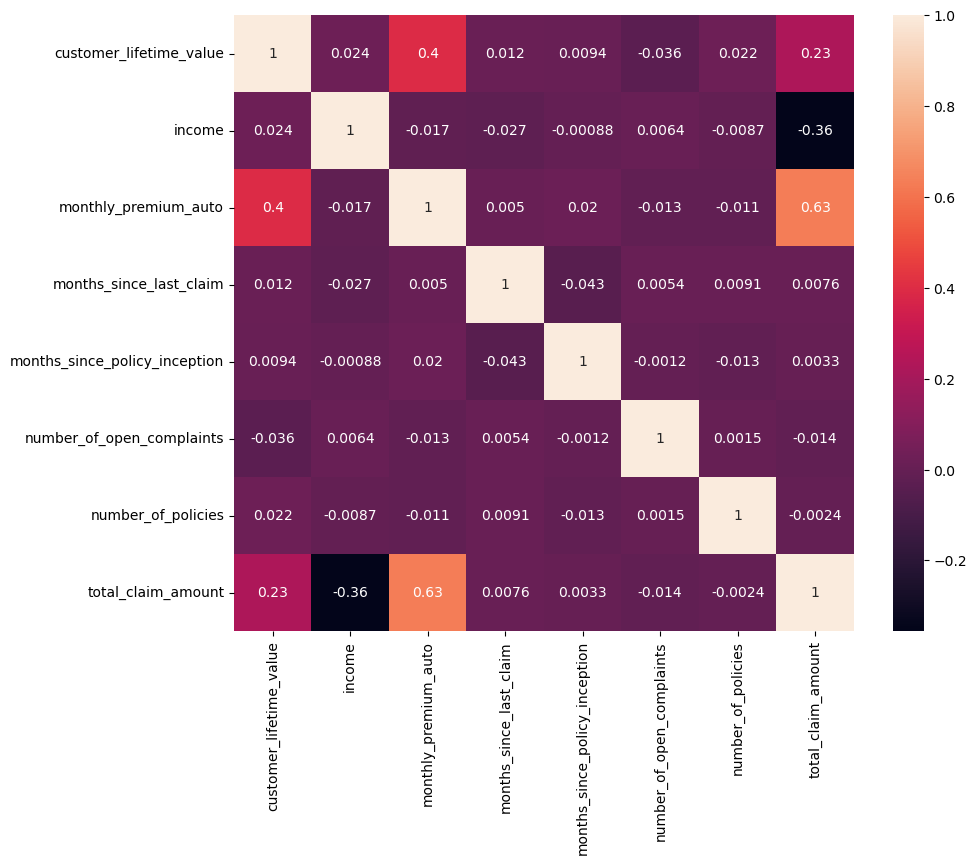

In [16]:
corr_matrix=customer_df.corr() 
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()


In [17]:
#  there is a high correlation between our target and monthly_premium_auto

<Axes: xlabel='monthly_premium_auto', ylabel='Count'>

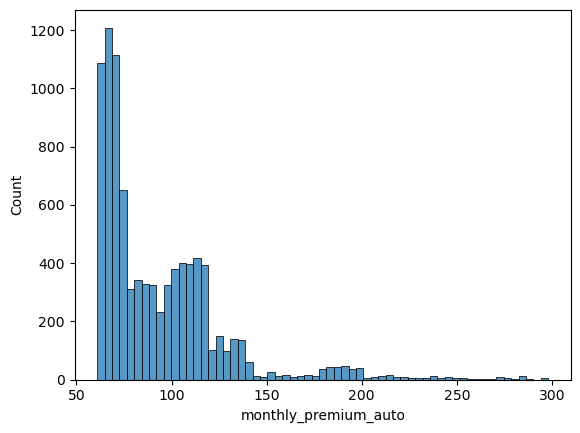

In [18]:
sns.histplot(data=discrete_df, x='monthly_premium_auto')  

<Axes: xlabel='months_since_last_claim', ylabel='Count'>

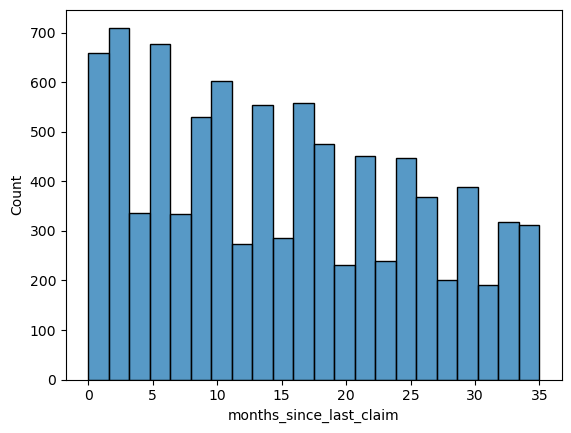

In [19]:
sns.histplot(data=discrete_df, x='months_since_last_claim')  

<Axes: xlabel='months_since_policy_inception', ylabel='Count'>

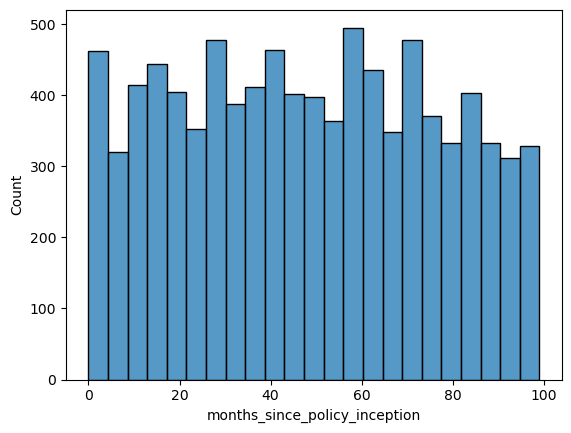

In [20]:
sns.histplot(data=discrete_df, x='months_since_policy_inception')  

<Axes: xlabel='number_of_open_complaints', ylabel='Count'>

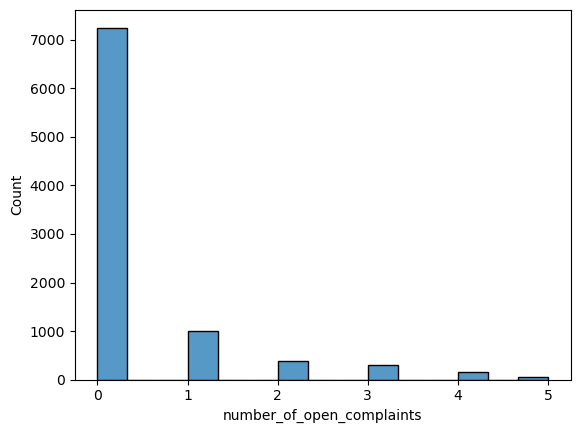

In [21]:
sns.histplot(data=discrete_df, x='number_of_open_complaints')  


<Axes: xlabel='number_of_policies', ylabel='Count'>

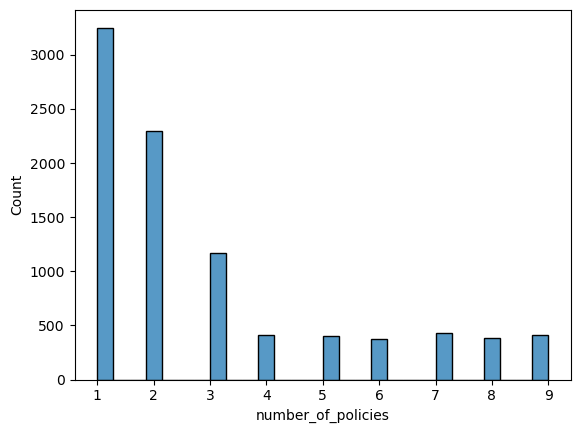

In [22]:
sns.histplot(data=discrete_df, x='number_of_policies')  

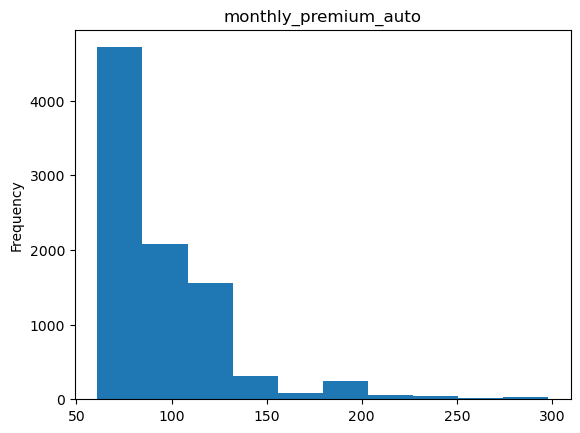

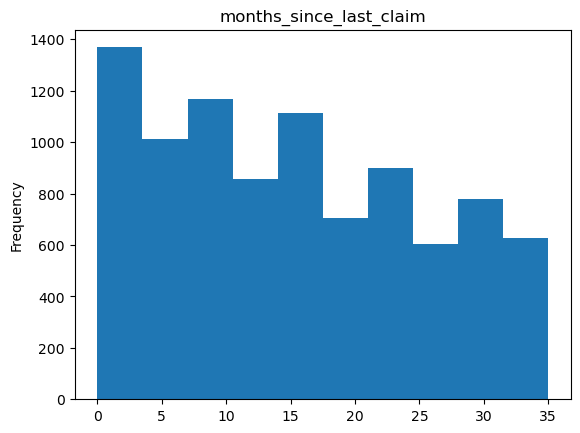

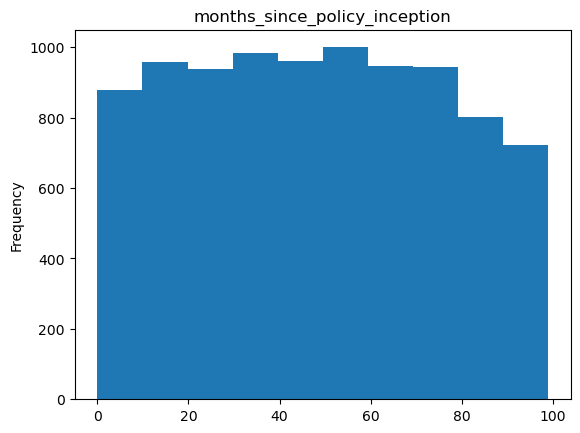

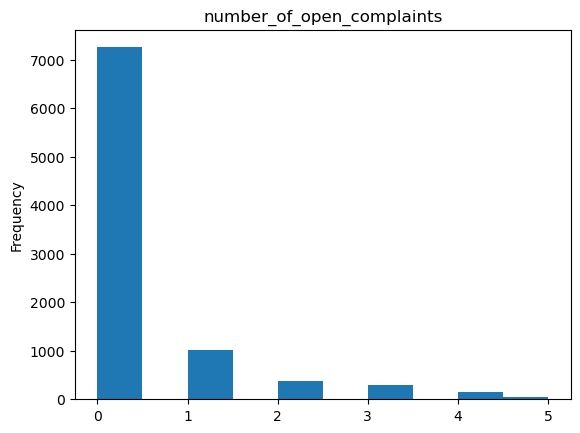

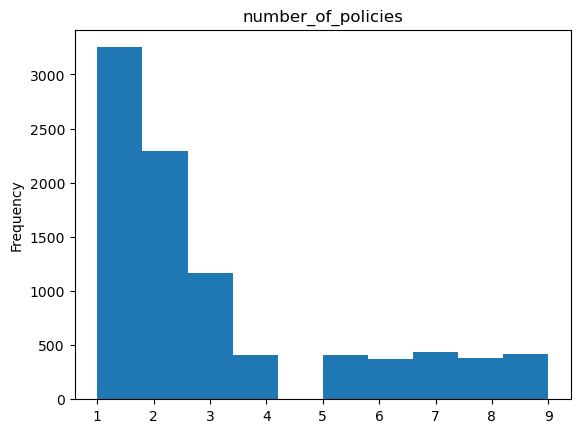

In [23]:
for col in discrete_df.columns:
    discrete_df[col].plot(kind='hist')
    plt.title(col)
    plt.show()

In [24]:
# # we have a right skewed distribution for monthly_premium_auto , more of a uniform one for months_since_policy_inception

In [25]:
continuous_df

,customer_lifetime_value,income,total_claim_amount
0,2763.519279,56274,384.811147
1,6979.535903,0,1131.464935
2,12887.431650,48767,566.472247
3,7645.861827,0,529.881344
4,2813.692575,43836,138.130879
...,...,...,...
9129,23405.987980,71941,198.234764
9130,3096.511217,21604,379.200000
9131,8163.890428,0,790.784983
9132,7524.442436,21941,691.200000


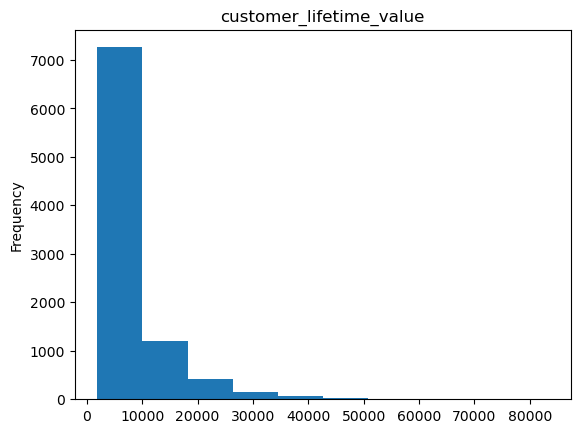

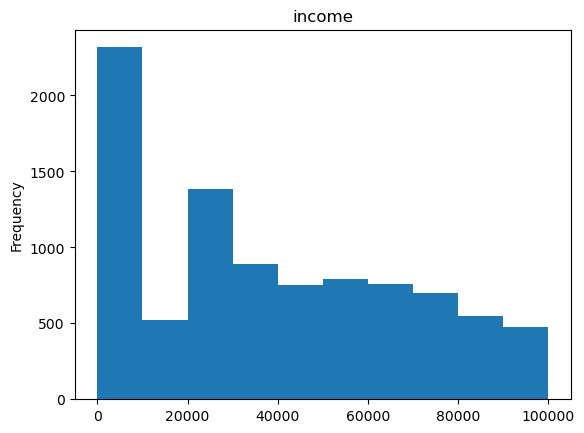

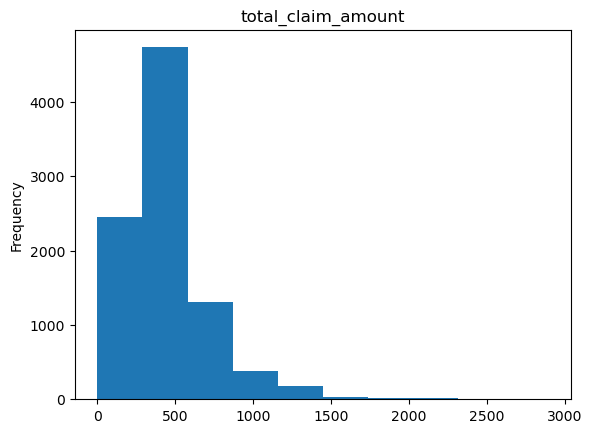

In [26]:
for col in continuous_df.columns:
    continuous_df[col].plot(kind='hist')
    plt.title(col)
    plt.show()

array([[<Axes: title={'center': 'customer_lifetime_value'}>,
        <Axes: title={'center': 'income'}>,
        <Axes: title={'center': 'total_claim_amount'}>],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

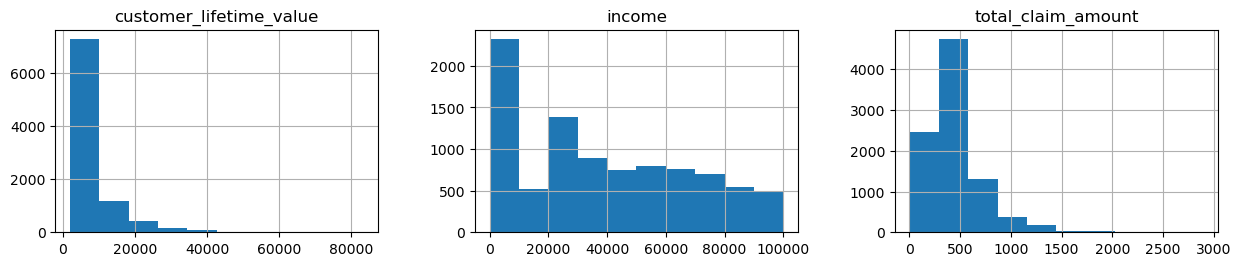

In [27]:
continuous_df.hist(figsize=(15,30),layout=(9,3))

In [28]:
# we have a right skewed distribution for costumer_liefetime_value 

In [29]:
continuous_df.describe() .T

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
total_claim_amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678


<Axes: >

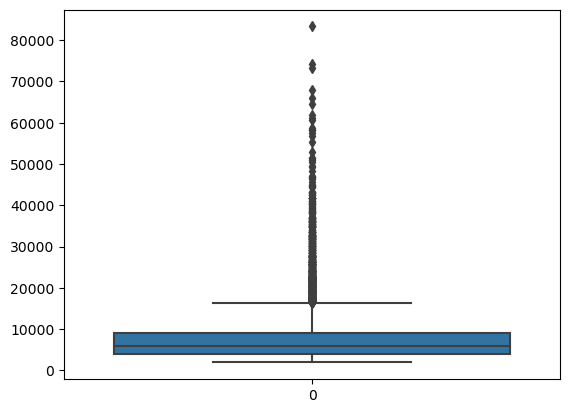

In [30]:
sns.boxplot(data=continuous_df['customer_lifetime_value'])

<Axes: >

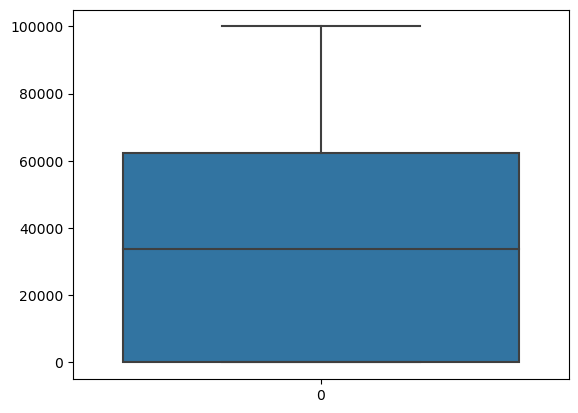

In [31]:
sns.boxplot(data=continuous_df['income'])

In [32]:
col2 = continuous_df['customer_lifetime_value']
count = col2[col2>20000].count()
count

575

In [33]:
# there are some (very) high values in "customer_lifetime_value" , but with 575 over the upper whisker, i don't thing eliminating the outliers is a good idea

In [34]:
numerical_df.isna().sum()

customer_lifetime_value          0
income                           0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
total_claim_amount               0
dtype: int64

In [35]:
numerical_df.to_csv(r'C:\Users\sorig\IH-Labs\lab-cleaning-numerical-data\files_for_lab\numerical_df.csv' , index=False)

In [36]:
categorical_df = customer_df.select_dtypes(object)

In [37]:
categorical_df.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [38]:
categorical_df.isna().sum()

customer            0
state               0
response            0
coverage            0
education           0
employmentstatus    0
gender              0
location_code       0
marital_status      0
policy_type         0
policy              0
renew_offer_type    0
sales_channel       0
vehicle_class       0
vehicle_size        0
dtype: int64

In [39]:
categorical_df.nunique()

customer            9134
state                  5
response               2
coverage               3
education              5
employmentstatus       5
gender                 2
location_code          3
marital_status         3
policy_type            3
policy                 9
renew_offer_type       4
sales_channel          4
vehicle_class          6
vehicle_size           3
dtype: int64

In [40]:
categorical_df.dtypes

customer            object
state               object
response            object
coverage            object
education           object
employmentstatus    object
gender              object
location_code       object
marital_status      object
policy_type         object
policy              object
renew_offer_type    object
sales_channel       object
vehicle_class       object
vehicle_size        object
dtype: object

In [41]:
print(categorical_df.nunique())

customer            9134
state                  5
response               2
coverage               3
education              5
employmentstatus       5
gender                 2
location_code          3
marital_status         3
policy_type            3
policy                 9
renew_offer_type       4
sales_channel          4
vehicle_class          6
vehicle_size           3
dtype: int64


In [42]:
# the customer id is alpha-numeric, but we probably could drop that column later. the other one is the "policy". we can leave it like this , we are going to encode it.

In [43]:
# we can drop policy_type as we have those values in policy

In [44]:
categorical_df['state'].unique()

array(['Washington', 'Arizona', 'Nevada', 'California', 'Oregon'],
      dtype=object)

In [45]:
categorical_df['coverage'].unique()

array(['Basic', 'Extended', 'Premium'], dtype=object)

In [46]:
categorical_df['education'].unique()

array(['Bachelor', 'College', 'Master', 'High School or Below', 'Doctor'],
      dtype=object)

In [47]:
# we are going to encode 'education' and reduce the number of values by grouping them

In [48]:
categorical_df["coverage"] = categorical_df["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})

In [49]:
categorical_df['education'] = categorical_df['education'].map({'Bachelor':'0.5', 'College':'0.5', 'Master':'1', 'High School or Below':'0', 'Doctor':'1'})  

In [50]:
categorical_df.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,0,0.5,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,1,0.5,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,2,0.5,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,0,0.5,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,0,0.5,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [51]:
categorical_df = categorical_df.drop(['policy_type'], axis =1)

In [52]:
categorical_df.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,0,0.5,Employed,F,Suburban,Married,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,1,0.5,Unemployed,F,Suburban,Single,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,2,0.5,Employed,F,Suburban,Married,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,0,0.5,Unemployed,M,Suburban,Married,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,0,0.5,Employed,M,Rural,Single,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [53]:
categorical_df['vehicle_class'].unique()

array(['Two-Door Car', 'Four-Door Car', 'SUV', 'Luxury SUV', 'Sports Car',
       'Luxury Car'], dtype=object)

In [54]:
categorical_df['vehicle_class'] = categorical_df['vehicle_class'].map({'Two-Door Car':'0', 'Four-Door Car':'0', 'SUV':'0.5', 'Luxury SUV':'1', 'Sports Car':'0.5', 'Luxury Car':'1'})  

In [55]:
categorical_df.to_csv(r'C:\Users\sorig\IH-Labs\categorical.csv', index=False) 

In [56]:
categorical_df['employmentstatus'].unique()

array(['Employed', 'Unemployed', 'Medical Leave', 'Disabled', 'Retired'],
      dtype=object)

In [57]:
categorical_df['employmentstatus'] = categorical_df['employmentstatus'].map({'Employed':'1', 'Unemployed':'0', 'Medical Leave':'1', 'Disabled':'0', 'Retired':'0'})  

In [58]:
categorical_df['location_code'].unique()

array(['Suburban', 'Rural', 'Urban'], dtype=object)

In [59]:
categorical_df['location_code'] = categorical_df['location_code'].map({'Suburban':'0.5', 'Rural':'0', 'Urban':'1'})  

In [60]:
categorical_df.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,0,0.5,1,F,0.5,Married,Corporate L3,Offer1,Agent,0,Medsize
1,QZ44356,Arizona,No,1,0.5,0,F,0.5,Single,Personal L3,Offer3,Agent,0,Medsize
2,AI49188,Nevada,No,2,0.5,1,F,0.5,Married,Personal L3,Offer1,Agent,0,Medsize
3,WW63253,California,No,0,0.5,0,M,0.5,Married,Corporate L2,Offer1,Call Center,0.5,Medsize
4,HB64268,Washington,No,0,0.5,1,M,0,Single,Personal L1,Offer1,Agent,0,Medsize


In [61]:
categorical_df['vehicle_size'].unique()

array(['Medsize', 'Small', 'Large'], dtype=object)

In [62]:
categorical_df['vehicle_size'] = categorical_df['vehicle_size'].map({'Small':'0', 'Medsize':'0.5', 'Large':'1'})  

In [63]:
categorical_df = categorical_df.drop(['customer'], axis=1)

In [64]:
categorical_df

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,0,0.5,1,F,0.5,Married,Corporate L3,Offer1,Agent,0,0.5
1,Arizona,No,1,0.5,0,F,0.5,Single,Personal L3,Offer3,Agent,0,0.5
2,Nevada,No,2,0.5,1,F,0.5,Married,Personal L3,Offer1,Agent,0,0.5
3,California,No,0,0.5,0,M,0.5,Married,Corporate L2,Offer1,Call Center,0.5,0.5
4,Washington,No,0,0.5,1,M,0,Single,Personal L1,Offer1,Agent,0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,0,0.5,1,M,1,Married,Personal L1,Offer2,Web,0,0.5
9130,California,Yes,1,0.5,1,F,0.5,Divorced,Corporate L3,Offer1,Branch,0,0.5
9131,California,No,1,0.5,0,M,0.5,Single,Corporate L2,Offer1,Branch,0,0.5
9132,California,No,1,0.5,1,M,0.5,Married,Personal L2,Offer3,Branch,0,1


In [65]:
customer_df['year']= customer_df['effective_to_date'].dt.year
customer_df['month']= customer_df['effective_to_date'].dt.month
customer_df['day']= customer_df['effective_to_date'].dt.day
customer_df = customer_df.drop(['effective_to_date'], axis=1)


In [66]:
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,employmentstatus,gender,income,location_code,...,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,year,month,day
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,Employed,F,56274,Suburban,...,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2011,2,24
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,Unemployed,F,0,Suburban,...,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,2011,1,31
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,Employed,F,48767,Suburban,...,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2011,2,19
3,WW63253,California,7645.861827,No,Basic,Bachelor,Unemployed,M,0,Suburban,...,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,2011,1,20
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,Employed,M,43836,Rural,...,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2011,2,3


In [67]:
customer_df.shape

(9134, 26)

In [68]:
categorical_df.shape

(9134, 13)

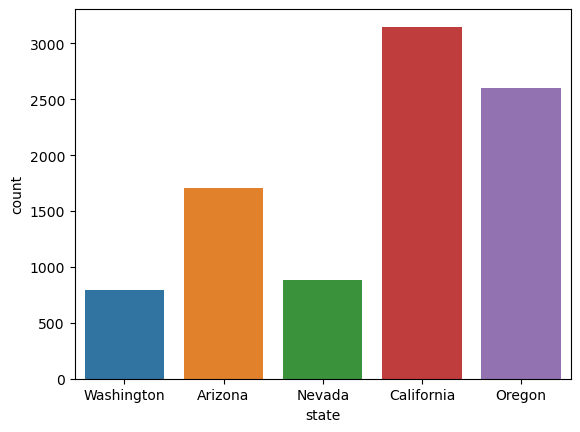

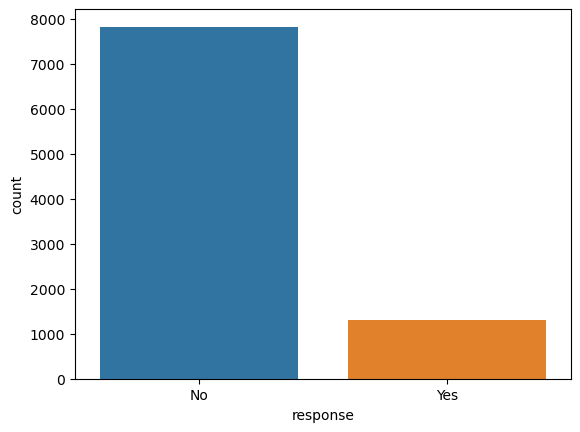

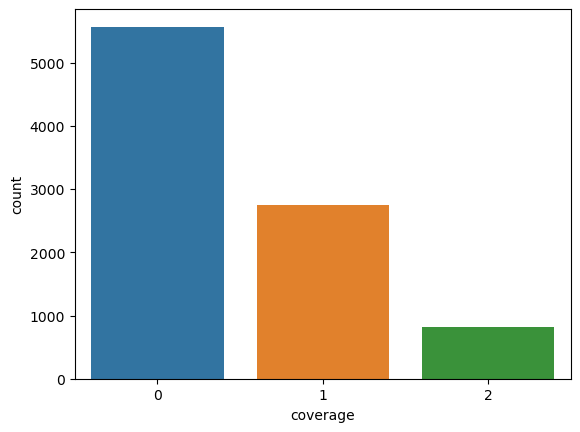

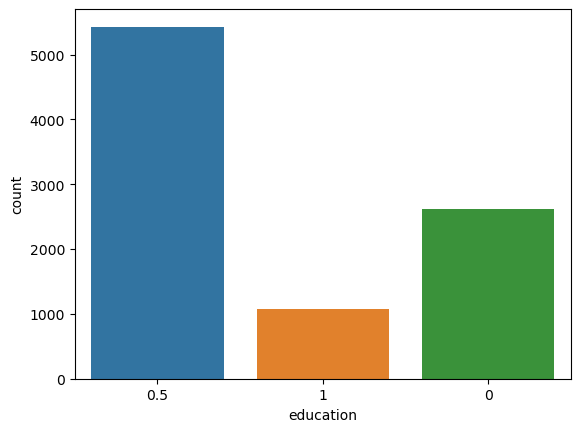

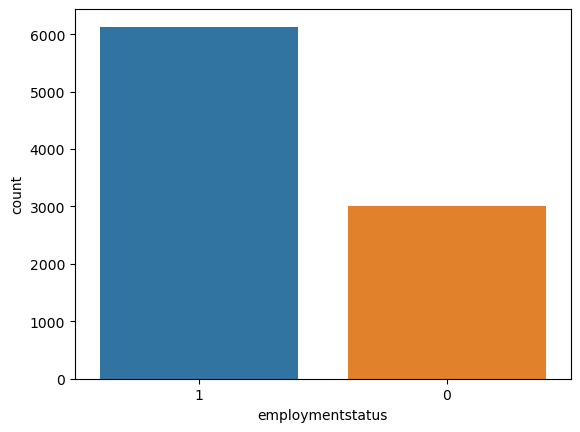

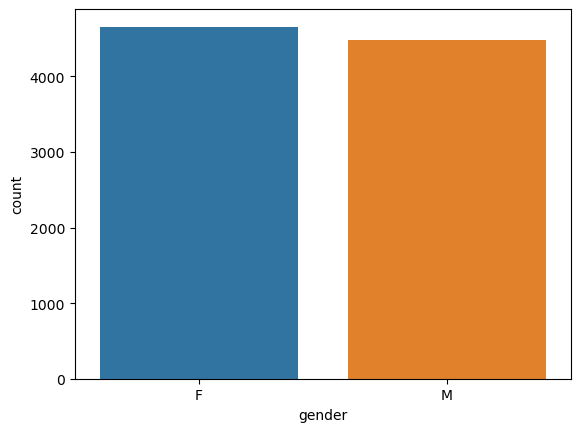

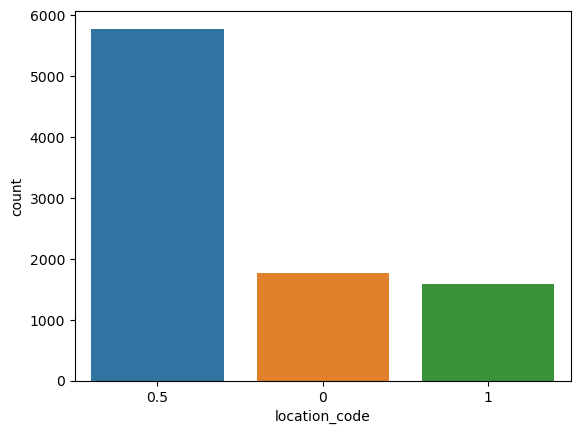

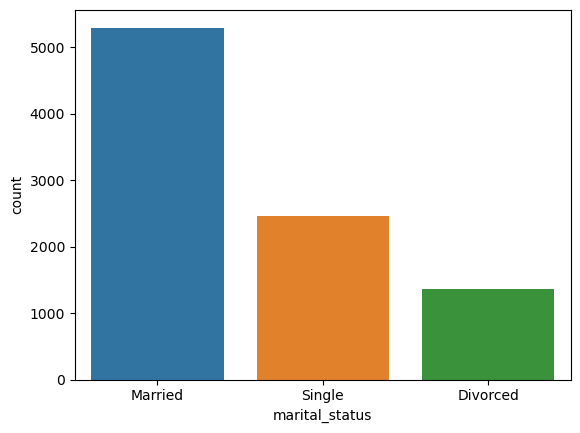

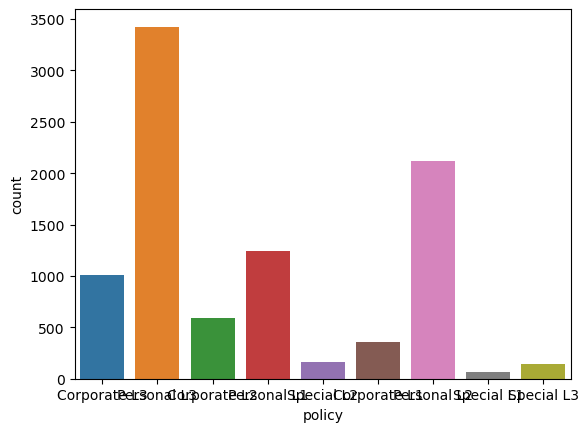

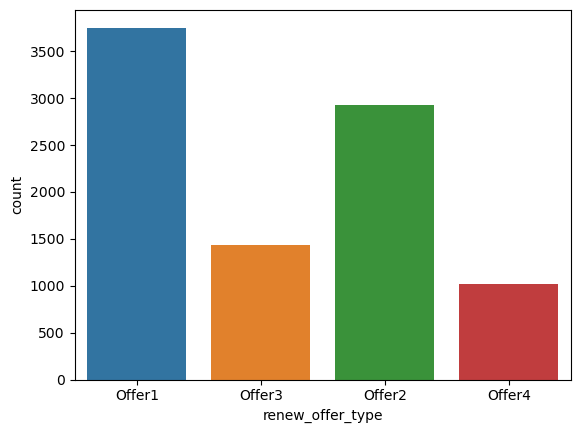

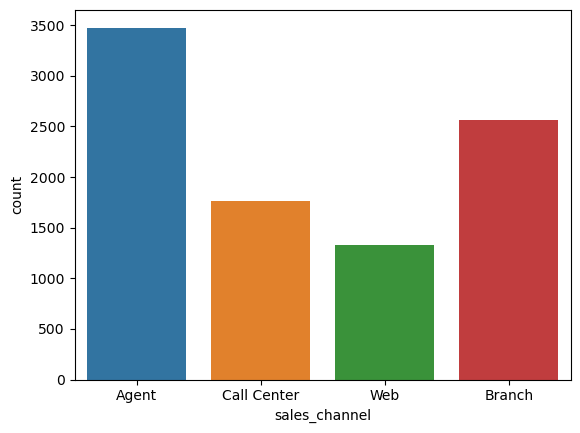

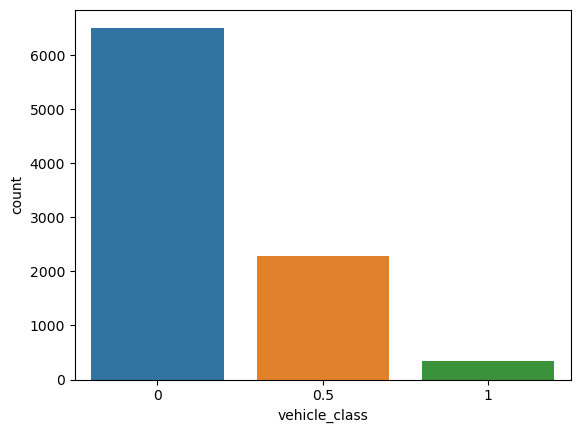

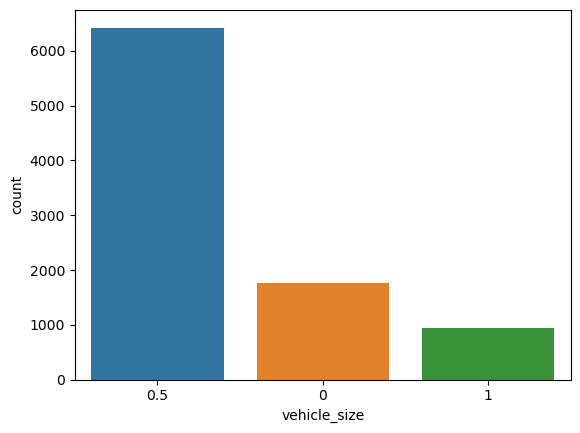

In [69]:
def plots_categorical(Dataframe):
    for column in Dataframe.columns:
        sns.countplot(x=Dataframe[column])
        plt.show()
    return None
   
plots_categorical(categorical_df)

In [ ]:
continuous_df.shape

In [ ]:
discrete_df.shape

In [ ]:
date_df = customer_df.filter(['year', 'month', 'day'], axis =1)
date_df

In [ ]:
#  we concatenate the dataframes into a final one, we will encode the categoricals with onehotencoded
data_final = pd.concat([continuous_df, discrete_df, date_df, categorical_df ], axis=1)  
data_final

In [ ]:
data_final.columns

In [ ]:
convert_dict = {'education': float,'employmentstatus': int,'location_code':float, 'vehicle_class':float,'vehicle_size':float}

In [ ]:
data_final = data_final.astype(convert_dict)
print(data_final.dtypes)

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
y = data_final['total_claim_amount']
X = data_final.drop('total_claim_amount', axis=1)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1337)


In [ ]:
X_train_num = X_train.select_dtypes(include = np.number)
X_test_num  = X_test.select_dtypes(include = np.number)
X_train_cat = X_train.select_dtypes(include = object)
X_test_cat  = X_test.select_dtypes(include = object)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
transformer = MinMaxScaler().fit(X_train_num) 

X_train_scaled_arr = transformer.transform(X_train_num)
X_train_scaled = pd.DataFrame(X_train_scaled_arr, columns=X_train_num.columns)
X_test_scaled_arr = transformer.transform(X_test_num)
X_test_scaled = pd.DataFrame(X_test_scaled_arr, columns=X_test_num.columns)
X_train_scaled.head()
# X_test_scaled.head()
 

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder = OneHotEncoder(drop='first').fit(X_train_cat)
encoded_cat = encoder.transform(X_train_cat).toarray()
cols = encoder.get_feature_names_out(input_features=X_train_cat.columns)
onehot_encoded = pd.DataFrame(encoded_cat, columns=cols)
onehot_encoded.head()


In [ ]:
encoded_test_cat = encoder.transform(X_test_cat).toarray()
onehot_encoded_test = pd.DataFrame(encoded_test_cat, columns=cols)
onehot_encoded_test.head()


In [ ]:
onehot_encoded_test['state_Oregon'].unique()

In [ ]:
onehot_encoded_test.dtypes

In [ ]:
X_train = pd.concat([X_train_scaled, onehot_encoded], axis=1)
X_test = pd.concat([X_test_scaled, onehot_encoded_test], axis=1)


In [ ]:
X_train_treated.head()

In [ ]:
X_test_treated.head()

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression


In [ ]:
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)


In [ ]:
from sklearn.metrics import r2_score
predictions = lm.predict(X_train)
r2_score(y_train, predictions)


In [ ]:
predictions_test = lm.predict(X_test)
r2_score(y_test, predictions_test)



In [ ]:
def funct(models):
    if 'LinearRegression' in models:
        lm = linear_model.LinearRegression()
        lm.fit(X_train,y_train)
        predictions = lm.predict(X_train)
        score_train = r2_score(y_train, predictions)
        predictions_test = lm.predict(X_test)
        score_test=r2_score(y_test, predictions_test)

        return score_train,score_test
    elif 'KNeighborsRegressor' in models :
        KNN = KNeighborsRegressor(n_neighbors=3)
        KNN.fit(X_train, y_train)
        score_train = KNN.score(X_train, y_train)
        score_test = KNN.score(X_test, y_test)
        return score_train,score_test
 


    
 


        
        
        

In [ ]:
funct('LinearRegression')

In [ ]:

from sklearn.neighbors import KNeighborsRegressor


In [ ]:
funct('KNeighborsRegressor')